# Introduction
Practice code based on [Menpo visualization](http://www.menpo.org/menpo/visualization.html). In particular, I was following the [examples](http://www.menpo.org/examples/) in the following sections

# [menpo](http://www.menpo.org/examples/)

## [menpo.io](http://nbviewer.jupyter.org/github/menpo/menpo-notebooks/blob/master/menpo/IO/Importing_Builtin_Assets.ipynb)

In [8]:
%matplotlib inline
import menpo.io as mio
image = mio.import_builtin_asset('takeo.ppm')
#image.view()

In [9]:
bb = mio.import_builtin_asset('breakingbad.jpg')
#bb.view();

In [10]:
builtin_assets = mio.ls_builtin_assets()
print('breaking bad assets are: {}'.format(
[a for a in builtin_assets if a.startswith('breakingbad')]))
print(bb.landmarks)
#bb.view_landmarks()

breaking bad assets are: ['breakingbad.jpg', 'breakingbad.pts']
LandmarkManager: n_groups: 1
(PTS): LandmarkGroup: n_labels: 1, n_points: 68


## [menpo Images](http://nbviewer.jupyter.org/github/menpo/menpo-notebooks/tree/master/menpo/Images/)

### [menpo Images Basics](http://nbviewer.jupyter.org/github/menpo/menpo-notebooks/blob/master/menpo/Images/Basics.ipynb)

In [11]:
%matplotlib inline
import numpy as np
import menpo.io as mio

lenna = mio.import_builtin_asset('lenna.png')
takeo_rgb = mio.import_builtin_asset.takeo_ppm() # equivalent to: mio.import_builtin_asset('takeo.ppm')
# Takeo is RGB with repeated channels - convert to greyscale
takeo = takeo_rgb.as_greyscale(mode='average')

In [14]:
print('Lenna is a {}'.format(type(lenna)))
print('Takeo is a {}'.format(type(takeo_rgb)))

Lenna is a <class 'menpo.image.base.Image'>
Takeo is a <class 'menpo.image.base.Image'>


In [15]:
print('Takeo shape: {}'.format(takeo.pixels.shape))
print('The number of channels in Takeo is {}'.format(takeo.pixels.shape[0]))
print("But the right way to find out is with the 'n_channels' property: {}".format(takeo.n_channels))
print('n_channels for Lenna is {}'.format(lenna.n_channels))

Takeo shape: (1, 225, 150)
The number of channels in Takeo is 1
But the right way to find out is with the 'n_channels' property: 1
n_channels for Lenna is 3


##### All images are landmarkable.

In [49]:
breakingbad = mio.import_builtin_asset('breakingbad.jpg')
#breakingbad.view_landmarks(group='PTS');

In [50]:
print(breakingbad.landmarks)

LandmarkManager: n_groups: 1
(PTS): LandmarkGroup: n_labels: 1, n_points: 68


In [142]:
bb = breakingbad.crop_to_landmarks(boundary=100)
# note that this method is smart enough to not stray outside the boundary of the image
#bb.view_landmarks(group='PTS',marker_size=5, marker_edge_colour='r', marker_face_colour='k', marker_edge_width=1);

In [84]:
bb = breakingbad.crop_to_landmarks_proportion(2.0)
# note that this method is smart enough to not stray outside the boundary of the image
#bb.view_landmarks(group='PTS', render_numbering=True, marker_size=10, numbers_font_size=10, marker_edge_colour='b', marker_face_colour='w', marker_edge_width=2);
#bb.view_landmarks(group='PTS', render_numbering=True, numbers_font_size=14, numbers_font_weight='bold');

#### BooleanImage

In [140]:
from menpo.image import BooleanImage
random_seed = np.random.random(lenna.shape) # shape doesn't include channel - and that's what we want
random_mask = BooleanImage(random_seed > 0.5)
print("the mask's shape is as expected: {}".format(random_mask.shape))
print("the channel has been added to the mask's pixel's shape for us: {}".format(random_mask.pixels.shape))
#random_mask.view();

the mask's shape is as expected: (512, 512)
the channel has been added to the mask's pixel's shape for us: (1, 512, 512)


In [95]:
all_true_mask = BooleanImage.init_blank((120, 240))
all_false_mask = BooleanImage.init_blank((120, 240), fill=False)

from copy import deepcopy
small_amount_true = deepcopy(all_false_mask)
small_amount_true.pixels[0, 4, 8] = True
small_amount_true.pixels[0, 15, 56] = True
small_amount_true.pixels[0, 0, 4] = True
print(small_amount_true.true_indices())  # note the ordering is incremental C ordered
print('The shape of true indices: {}'.format(small_amount_true.true_indices().shape))
print('The shape of false indices: {}'.format(small_amount_true.false_indices().shape))

[[ 0  4]
 [ 4  8]
 [15 56]]
The shape of true indices: (3, 2)
The shape of false indices: (28797, 2)


In [97]:
lenna_masked_pixels_flatted = lenna.pixels[0, random_mask.mask]
lenna_masked_pixels_flatted.shape
# note we can only do this as random_mask is the shape of lenna
print('Is Lenna and random mask the same shape? {}'.format(lenna.shape == random_mask.shape))

Is Lenna and random mask the same shape? True


In [98]:
print(lenna)

512W x 512H 2D Image with 3 channels


#### MaskedImage

In [129]:
takeo_masked = takeo.as_masked()
print(takeo_masked.mask)
#takeo_masked.mask.view(figure_size=(6, 4), render_axes=True);

breakingbad_masked = breakingbad.as_masked()
print(breakingbad_masked.mask)
#breakingbad_masked.mask.view(new_figure=True, figure_size=(6, 4), render_axes=True);

150W x 225H 2D mask, 100.0% of which is True
1920W x 1080H 2D mask, 100.0% of which is True


In [139]:
bb_masked_constrained = breakingbad_masked.constrain_mask_to_landmarks()
#bb_masked_constrained.view(masked=False);
#bb_masked_constrained.view_landmarks(new_figure=True);

#### Widgets

In [138]:
#breakingbad.view_widget()

In [137]:
from menpowidgets import visualize_images

#visualize_images([takeo, breakingbad_masked, lenna])

### Image Features

In [143]:
%matplotlib inline
import menpo.io as mio
import matplotlib.pyplot as plt

403W x 411H 2D mask, 58.9% of which is True


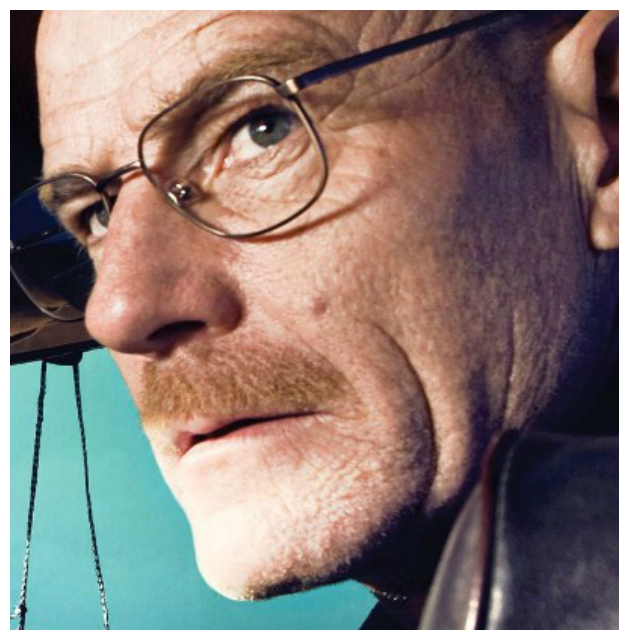

In [144]:
breaking_bad = mio.import_builtin_asset.breakingbad_jpg()
breaking_bad = breaking_bad.as_masked()
breaking_bad = breaking_bad.crop_to_landmarks(boundary=20)
breaking_bad = breaking_bad.constrain_mask_to_landmarks()
breaking_bad.view(masked=False);
print(breaking_bad.mask)

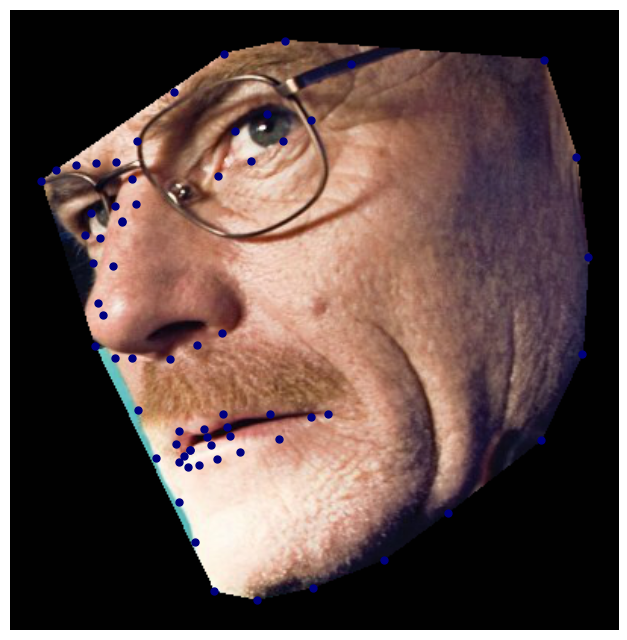

In [146]:
breaking_bad.view_landmarks();

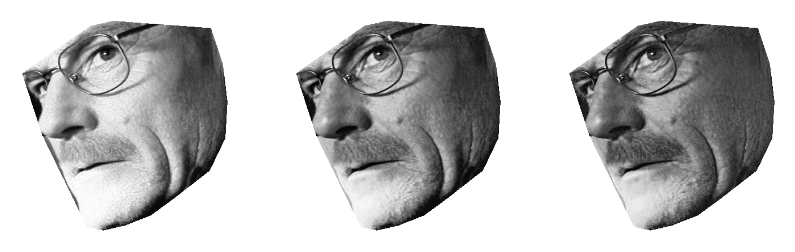

In [147]:

breaking_bad.view(channels='all');

#### HOG Features (Histogram of Oriented Gradients)

##### Dense HOGs